In [26]:
from sense_op import SenseOp

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

%matplotlib inline

# Fig 4

In [22]:
senseop = SenseOp('./data/rawdata_brain_radial_96proj_12ch.h5', use_hamming=True, shift = (0,150))

senseop.gen_coilmaps()
truth = senseop.base_coilrecon()

res = []

for R in [4, 3, 2]:
    print('-- Figure 4: running SENSE for R = %d' % R)
    senseop.retro_undersample(R, False)
    im, all_err, all_d = senseop.SENSE(80, truth = truth, calc_error = True)
    res.append((R, im, all_err, all_d))

-- Figure 4: running SENSE for R = 4
Iteration (n_iter 80) = 0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, Done!
-- Figure 4: running SENSE for R = 3
Iteration (n_iter 80) = 0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, Done!
-- Figure 4: running SENSE for R = 2
Iteration (n_iter 80) = 0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, Done!


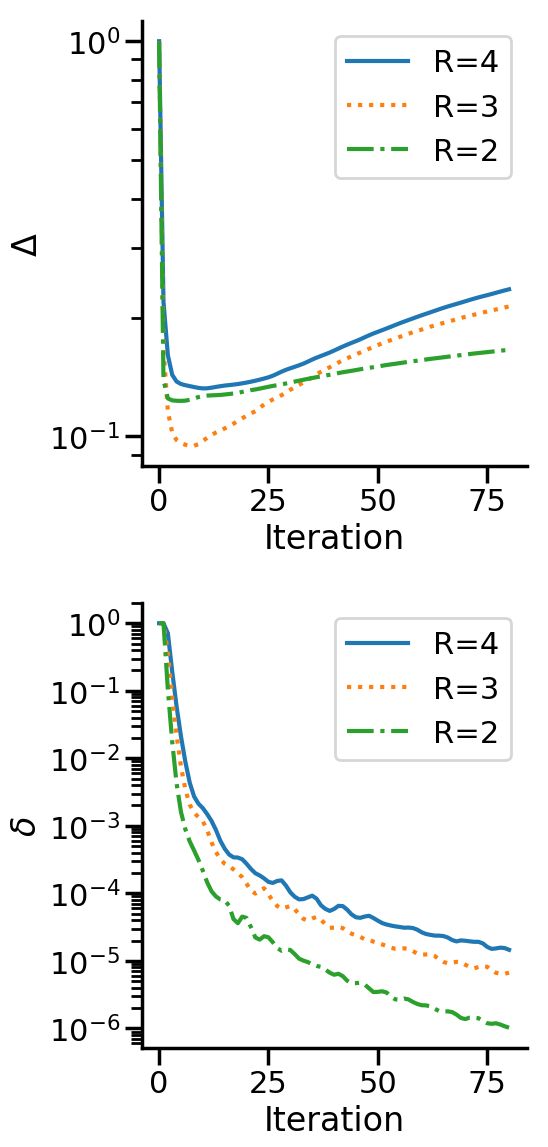

In [23]:
sns.set_context("poster")

f, axarr = plt.subplots(2, 1, squeeze=False, figsize = (6,12))

axarr[0,0].plot(res[0][2], label='R=%d' % res[0][0])
axarr[0,0].plot(res[1][2], label='R=%d' % res[1][0], linestyle=':')
axarr[0,0].plot(res[2][2], label='R=%d' % res[2][0], linestyle='-.')
axarr[0,0].set_yscale('log')
axarr[0,0].set_ylabel(r"$\Delta$")
axarr[0,0].set_xlabel(r"Iteration")
axarr[0,0].legend()

axarr[1,0].plot(res[0][3], label='R=%d' % res[0][0])
axarr[1,0].plot(res[1][3], label='R=%d' % res[1][0], linestyle=':')
axarr[1,0].plot(res[2][3], label='R=%d' % res[2][0], linestyle='-.')
axarr[1,0].set_yscale('log')
axarr[1,0].set_ylabel(r"$\delta$")
axarr[1,0].set_xlabel(r"Iteration")
axarr[1,0].legend()

sns.despine()
plt.tight_layout()

# plt.savefig('figs/fig4.png',bbox_inches='tight',dpi=300)

# Fig 5

In [25]:
senseop = SenseOp('./data/rawdata_brain_radial_96proj_12ch.h5', use_hamming=True, shift = (0,150))

senseop.gen_coilmaps()

res = []

for R in [1,2,3,4]:
    print('-- Figure 5: running SENSE for R = %d' % R)
    senseop.retro_undersample(R, False)
    im = senseop.SENSE(8)[0]
    imc = senseop.single_coil()
    im0 = senseop.base_coilrecon()
    res.append((R, imc, im0, im))

-- Figure 5: running SENSE for R = 1
Iteration (n_iter 8) = 0, 1, 2, 3, 4, 5, 6, 7, Done!
-- Figure 5: running SENSE for R = 2
Iteration (n_iter 8) = 0, 1, 2, 3, 4, 5, 6, 7, Done!
-- Figure 5: running SENSE for R = 3
Iteration (n_iter 8) = 0, 1, 2, 3, 4, 5, 6, 7, Done!
-- Figure 5: running SENSE for R = 4
Iteration (n_iter 8) = 0, 1, 2, 3, 4, 5, 6, 7, Done!


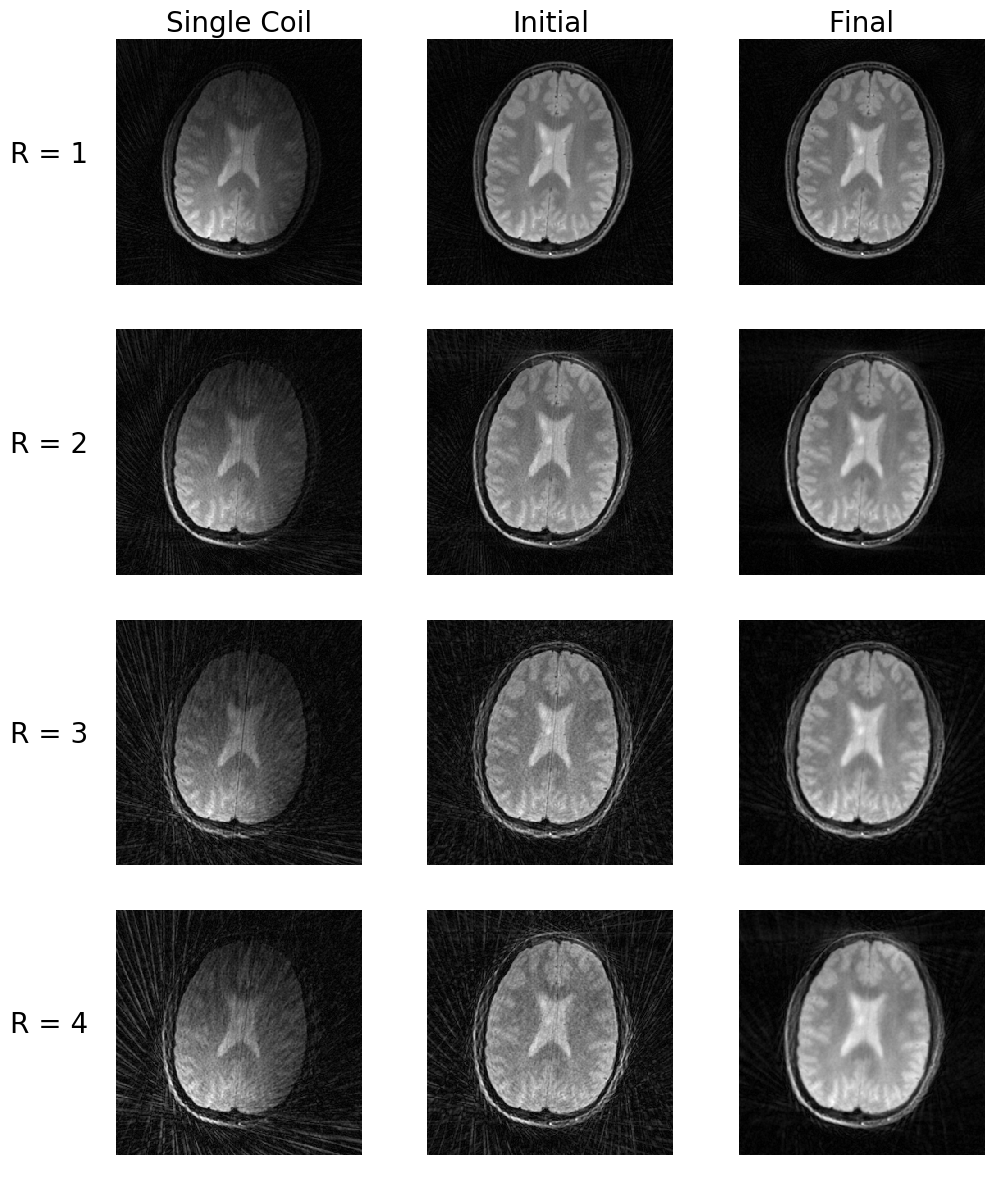

In [27]:
mpl.rcParams.update(mpl.rcParamsDefault)

f, axarr = plt.subplots(4, 3, squeeze=False, figsize = (10,12))


axarr[0,0].set_title('Single Coil', fontsize=20)
axarr[0,1].set_title('Initial', fontsize=20)
axarr[0,2].set_title('Final', fontsize=20)

for ii in range(4):
    axarr[ii,0].imshow(np.abs(res[ii][1]), interpolation='nearest', origin='lower', cmap='gray')
    axarr[ii,0].axis('off')
    axarr[ii,0].text(-130,150,'R = %d' % res[ii][0], rotation=0, fontsize=20)

    axarr[ii,1].imshow(np.abs(res[ii][2]), interpolation='nearest', origin='lower', cmap='gray')
    axarr[ii,1].axis('off')

    axarr[ii,2].imshow(np.abs(res[ii][3]), interpolation='nearest', origin='lower', cmap='gray')
    axarr[ii,2].axis('off')

plt.tight_layout()
# plt.savefig('figs/fig5.png',bbox_inches='tight',dpi=300)

# Fig 6

In [28]:
senseop = SenseOp('./data/rawdata_heart_radial_55proj_34ch.h5', use_hamming=True, fov_mod = (1, 1.4), shift=(-180,0))

senseop.gen_coilmaps()

res = []

for R in [1,1.6666,2.5,5]:
    print('-- Figure 6: running SENSE for R = %d' % R)
    senseop.retro_undersample(R, True)
    im = senseop.SENSE(8)[0]
    imc = senseop.single_coil()
    im0 = senseop.base_coilrecon()
    res.append((R, imc, im0, im))

-- Figure 6: running SENSE for R = 1
Iteration (n_iter 8) = 0, 1, 2, 3, 4, 5, 6, 7, Done!
-- Figure 6: running SENSE for R = 1
Iteration (n_iter 8) = 0, 1, 2, 3, 4, 5, 6, 7, Done!
-- Figure 6: running SENSE for R = 2
Iteration (n_iter 8) = 0, 1, 2, 3, 4, 5, 6, 7, Done!
-- Figure 6: running SENSE for R = 5
Iteration (n_iter 8) = 0, 1, 2, 3, 4, 5, 6, 7, Done!


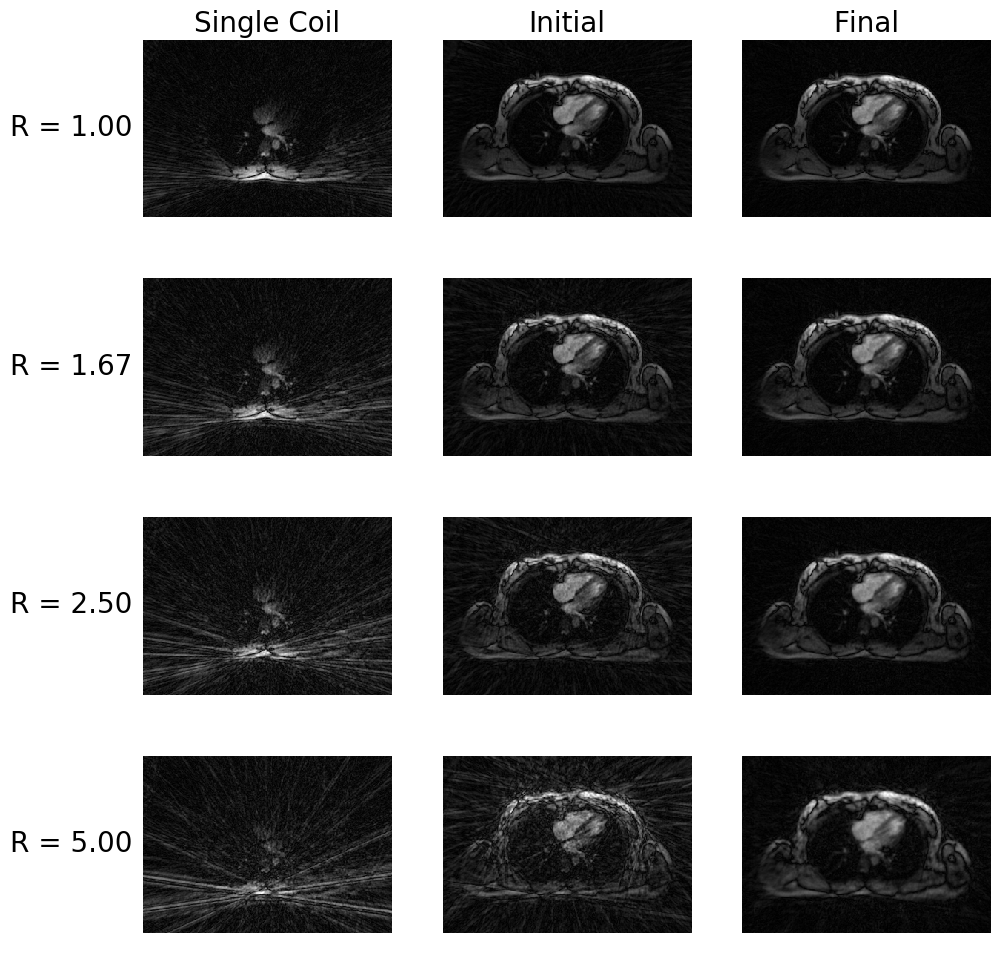

In [29]:
mpl.rcParams.update(mpl.rcParamsDefault)

f, axarr = plt.subplots(4, 3, squeeze=False, figsize = (10,10))


axarr[0,0].set_title('Single Coil', fontsize=20)
axarr[0,1].set_title('Initial', fontsize=20)
axarr[0,2].set_title('Final', fontsize=20)

for ii in range(4):
    axarr[ii,0].imshow(np.abs(res[ii][1]), interpolation='nearest', origin='lower', cmap='gray')
    axarr[ii,0].axis('off')
    axarr[ii,0].text(-180,110,'R = %.2f' % res[ii][0], rotation=0, fontsize=20)

    axarr[ii,1].imshow(np.abs(res[ii][2]), interpolation='nearest', origin='lower', cmap='gray')
    axarr[ii,1].axis('off')

    axarr[ii,2].imshow(np.abs(res[ii][3]), interpolation='nearest', origin='lower', cmap='gray')
    axarr[ii,2].axis('off')

plt.tight_layout()
# plt.savefig('figs/fig6.png',bbox_inches='tight',dpi=300)